## Participants

* Samantha
* Rachelle
* Andrew


## Résumé des observations

Ce jeu de données comprend 8 colonnes et 48 459 150 lignes

# <div style='color:white;background: #005792;text-align: center;padding: 15px 0'>Recommandations - Visualisation de la source de données Title akas</div>

### Installation des librairies

In [ ]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install plotly-express
# !pip install plotly

### Importation des librairies

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import re

### Chargement des fichiers

In [2]:
source_dir= '/home/dstrec/dstrec/010_data/000_source/imdb_datasets'
name_file= 'title.akas.tsv'
file_path= f"{source_dir}/{name_file}"

In [3]:
df= pd.read_csv(file_path, sep='\t', na_values='\\N', low_memory=False, nrows=20000000) 
df.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Carmencita,NaN,NaN,original,NaN,1
1,tt0000001,2,Carmencita,DE,NaN,NaN,literal title,0
2,tt0000001,3,Carmencita,US,NaN,imdbDisplay,NaN,0
3,tt0000001,4,Carmencita - spanyol tánc,HU,NaN,imdbDisplay,NaN,0
4,tt0000001,5,Καρμενσίτα,GR,NaN,imdbDisplay,NaN,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000000 entries, 0 to 19999999
Data columns (total 8 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   titleId          object
 1   ordering         int64 
 2   title            object
 3   region           object
 4   language         object
 5   types            object
 6   attributes       object
 7   isOriginalTitle  int64 
dtypes: int64(2), object(6)
memory usage: 1.2+ GB


### Visualisation de la part de non renseigné

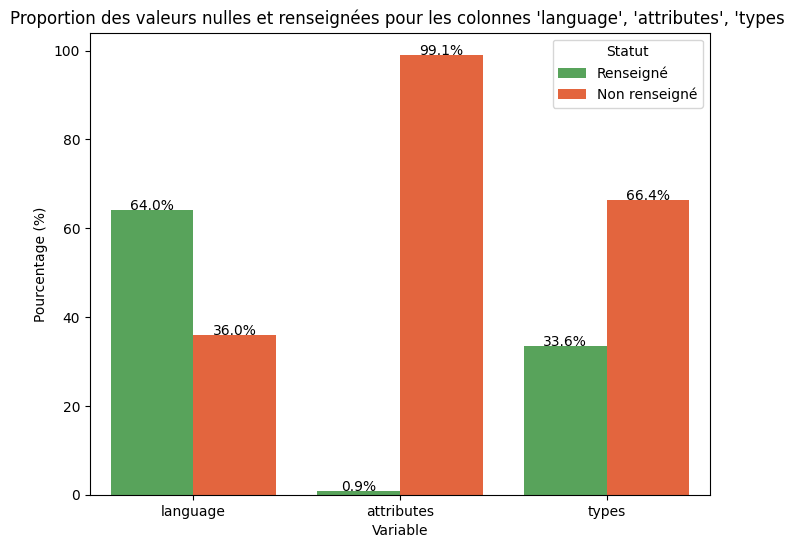

In [8]:
# Colonnes à représenter
columns_to_plot = ['language', 'attributes', 'types']

# Préparation des données pour les deux colonnes
data = []
for col in columns_to_plot:
    total_count = len(df[col])
    null_count = df[col].isna().sum() / total_count * 100
    non_null_count = df[col].notna().sum() / total_count * 100
    data.append([col, 'Renseigné', non_null_count])
    data.append([col, 'Non renseigné', null_count])

# Transformation en DataFrame
plot_df = pd.DataFrame(data, columns=['Variable', 'Statut', 'Pourcentage'])

# Création du diagramme en barres groupées
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Variable', y='Pourcentage', hue='Statut', data=plot_df, palette=["#4CAF50", "#FF5722"])

# Ajout des pourcentages sur les barres
for p in ax.patches:
    height = p.get_height()
    if height > 0.5:  # Seulement annoter si le pourcentage est supérieur à 0.5%
        ax.annotate(f'{height:.1f}%', 
                    xy=(p.get_x() + p.get_width() / 2, height), 
                    xytext=(0, 3),
                    textcoords="offset points", 
                    ha='center', va='center')

plt.ylabel('Pourcentage (%)')
plt.title("Proportion des valeurs nulles et renseignées pour les colonnes 'language', 'attributes', 'types ")
plt.show()